# Data Wrangling: WeRateDogs

In [1]:
#import needed libs
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# libs needed to gather data from tweeter API
import tweepy
from tweepy import OAuthHandler

# Gatharing

## 1.1 Download 'img predection' file

In [ ]:
# getting the "image_predictions" file using requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
page = requests.get(url)
with open("image_predictions.tsv","w") as f:
    f.write(page.text)

## 1.2 Quering Twitter API data

In [ ]:
# These are the hidden keys for the Twitter's API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Make a list with the tweeter_ids to fetech 
df_1 = pd.read_csv("twitter_archive_enhanced.csv")
tweet_ids = df_1.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails = []
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail beacuse : " + e)
            fails.append(tweet_id)
            pass

### 1.2.1 Extract data from 'tweet_json' 

In [ ]:
# Extract data needed from the "tweet_json" to make csv file
dict_json = {'tweet_id':[],'retweet_count':[],'favorite_count':[]}
with open("tweet_json.txt","r") as f:
    lines  = f.readlines()
    for line in lines:
        line_json = json.loads(line)
        dict_json['retweet_count'].append(line_json['retweet_count'])
        dict_json['favorite_count'].append(line_json['favorite_count'])
        dict_json['tweet_id'].append(line_json['id'])        
        
df_json = pd.DataFrame(dict_json)
df_json.to_csv("tweet_json.csv",index=False)

# Assessing

In [2]:
df_Archive = pd.read_csv("twitter_archive_enhanced.csv")
df_img = pd.read_csv("image_predictions.tsv","\t")
df_api = pd.read_csv("tweet_json.csv")

## Visual assessment

In [3]:
df_Archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
df_api.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [4]:
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## Programatic assessment

In [6]:
df_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [8]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Summry of assessment

## `Archive table` ++ `api table`
### Quality
1. last 4 coloumns type
2. Missing data at expanded_urls

### Tidness
3. Explore coloumn 1,2,6,7,8

## `img predections table`
### Quality
1. last 4 coloumns type
2. Missing data at expanded_urls

### Tidness
3. Explore coloumn 1,2,6,7,8

# Clean

In [ ]:
archive_clean = df_Archive.copy()
img_clean = df_img.copy()
api_clean = df_api.copy()

In [ ]:
# merging the cleand data for the tweet info
data_clean = pd.merge(archive_clean, api_clean, on = "tweet_id", how = "inner")

## `Tweet data table`

### define

### code

#### issue 1

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### issue 2

In [ ]:
df=df.replace({'None':np.NaN})
df["classification"] = df[['doggo', 'floofer',"puppo","pupper"]].fillna("").agg(''.join, axis=1)
df=df.replace({'':np.NaN})
df.drop(['doggo', 'floofer',"puppo","pupper"], axis = 1,inplace=True)
data_cleaned.classification = data_cleaned.classification.fillna("Not classified")

#### issue 3

In [ ]:
df_cleaned = df_cleaned.astype({'tweet_id': 'object'})

#### issue 4

In [ ]:
data.name=data.name.replace({'a':np.NaN})
data_cleaned.name = data_cleaned.name.fillna("Not provided")

#### issue 5

In [ ]:
data['rate'] = (data.rating_numerator / data.rating_denominator)*100

#### issue 6

In [ ]:
data['hour'] = data.timestamp.dt.hour
data.drop(['rating_numerator','rating_denominator','timestamp'], axis = 1,inplace=True)

### test

In [ ]:
data.rate.describe()

In [ ]:
data.head(2)

## `img predections table`

### define

### code

#### issue 1

In [ ]:
predections['p1_conf'] = predections['p1_conf']*100
predections['p1_conf'] = predections['p1_conf'].round(2)
predections['p2_conf'] = predections['p2_conf']*100
predections['p2_conf'] = predections['p2_conf'].round(2)
predections['p3_conf'] = predections['p3_conf']*100
predections['p3_conf'] = predections['p3_conf'].round(2)

### test

In [ ]:
predections.describe().round(2)

## Saving the cleaned data 

In [ ]:
data_clean.to_csv("twitter_archive_master.csv",index=False)
img_clean.to_csv("img_predictions_master.csv",index=False)

# Visualization

In [ ]:
# setting seaborn theme to the visualas
sns.set()

In [ ]:
data_cleaned = pd.read_csv("twitter_archive_master.csv")
pred_cleaned = pd.read_csv("img_predictions_master.csv")

In [ ]:
data_cleaned.info()

In [ ]:
pred_cleaned.info()

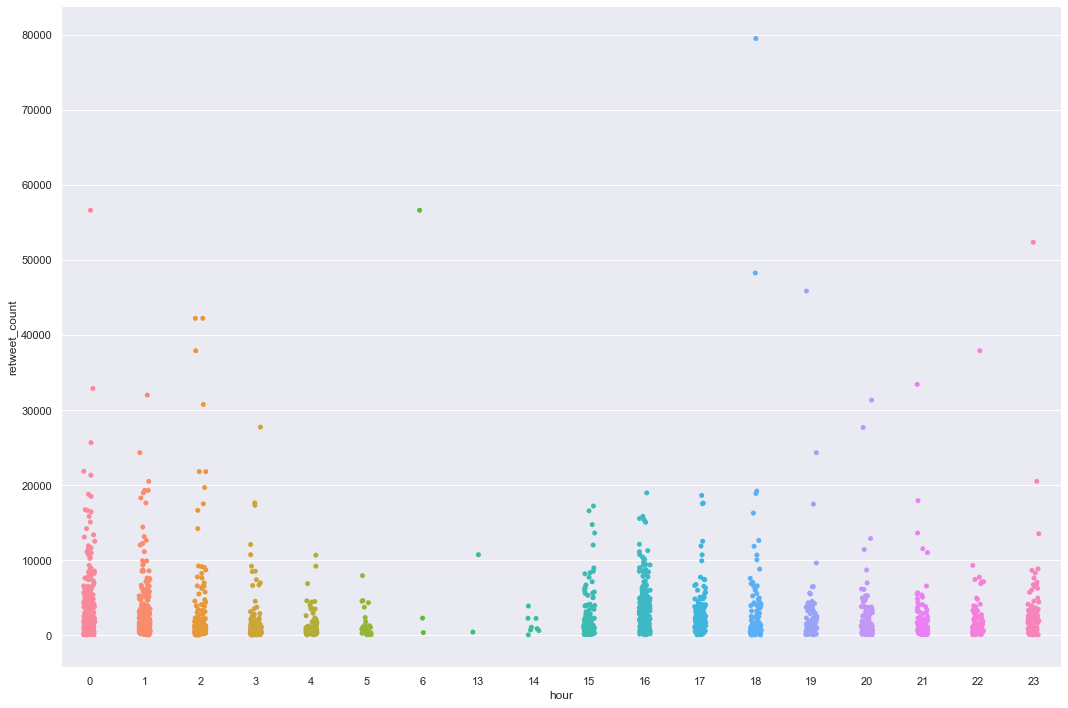

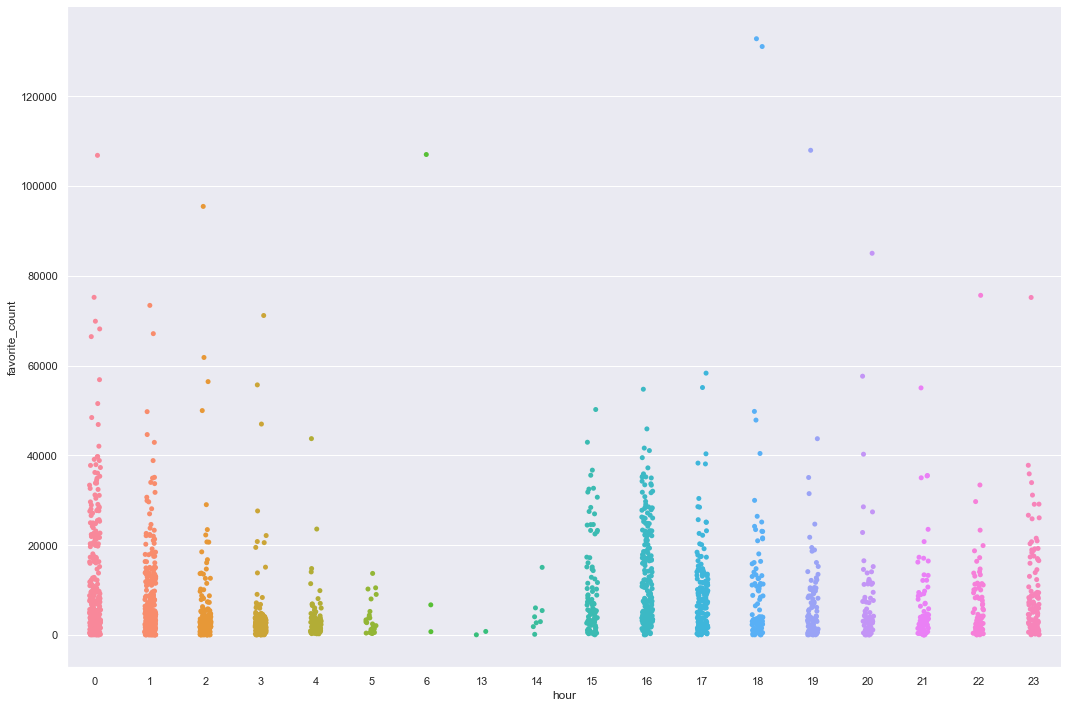

In [32]:
tips = data_cleaned.copy()
hours_fav = sns.catplot(y="retweet_count", x="hour", data=tips,height=10,aspect=1.5);
hours_ret = sns.catplot(y="favorite_count", x="hour", data=tips,height=10,aspect=1.5);


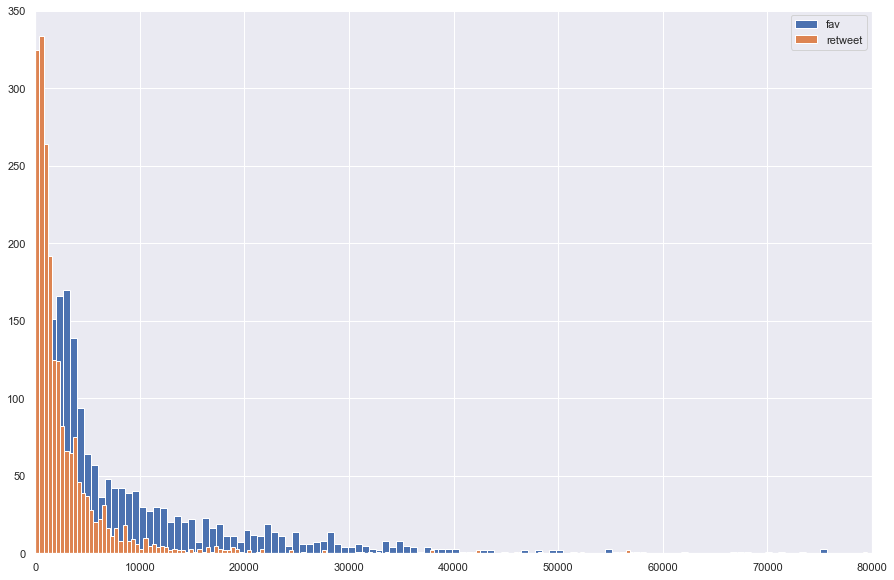

In [30]:
plt.figure(figsize=(15,10))
plt.xlim(0,80000)
plt.hist(data_cleaned.favorite_count, bins=200, label = "fav")
plt.hist(data_cleaned.retweet_count, bins=200, label = "retweet") 
plt.legend()

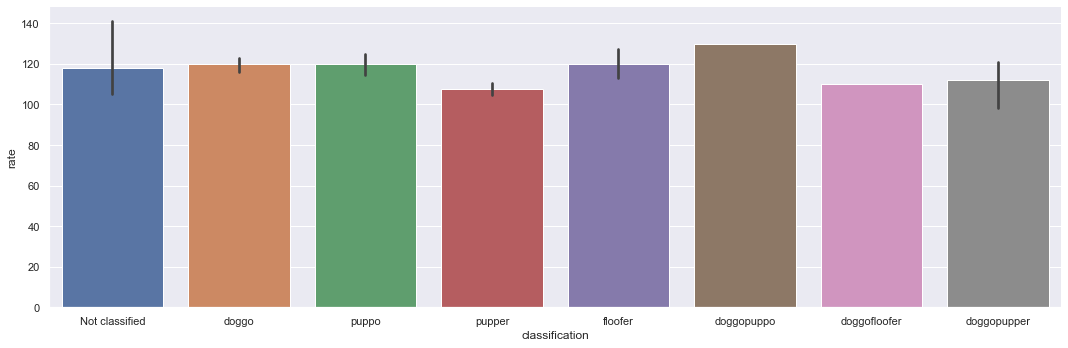

In [24]:
sns.catplot(data=tips, kind="bar", x="classification", y="rate", aspect = 3)
